# Plotting distributions
First, import relevant libraries:

In [9]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *


In [10]:
import sys
sys.path.append('../../src/')
from utils.database import dbutils

conn = dbutils.connect()
cursor = conn.cursor()

Then, load the data (takes a few moments):

In [13]:
dfc = pd.read_sql('select * from optourism.italians_counts_new', con=conn)
dfc.head()

,cust_id,home_region,calls,days_active,days_active_in_florence_comune,calls_in_florence_comune
0,6727704,Emilia-Romagna,54678,39,0,0
1,25440450,Campania,52588,48,20,120
2,29613826,Lazio,52546,46,26,320
3,4402964,Toscana,49496,35,0,0
4,14653229,Toscana,40713,29,0,0


In [14]:
def frequency(dataframe,columnname):
    out = dataframe[columnname].value_counts().to_frame()
    out.columns = ['frequency']
    out.index.name = columnname
    out.reset_index(inplace=True)
    out = out.sort_values(columnname)
    out['cumulative'] = out['frequency'].cumsum()/out['frequency'].sum()
    out['ccdf'] = 1 - out['cumulative']
    return out

In [15]:
# 1.1, 1.2, 1.3
frc_ua = frequency(dfc,'calls')
frc_uc = frequency(dfc,'calls_in_florence_comune')
frc_da = frequency(dfc,'days_active')
frc_dc = frequency(dfc,'days_active_in_florence_comune')

frc2 = frequency(dfc[dfc['calls_in_florence_comune']>0],'calls')

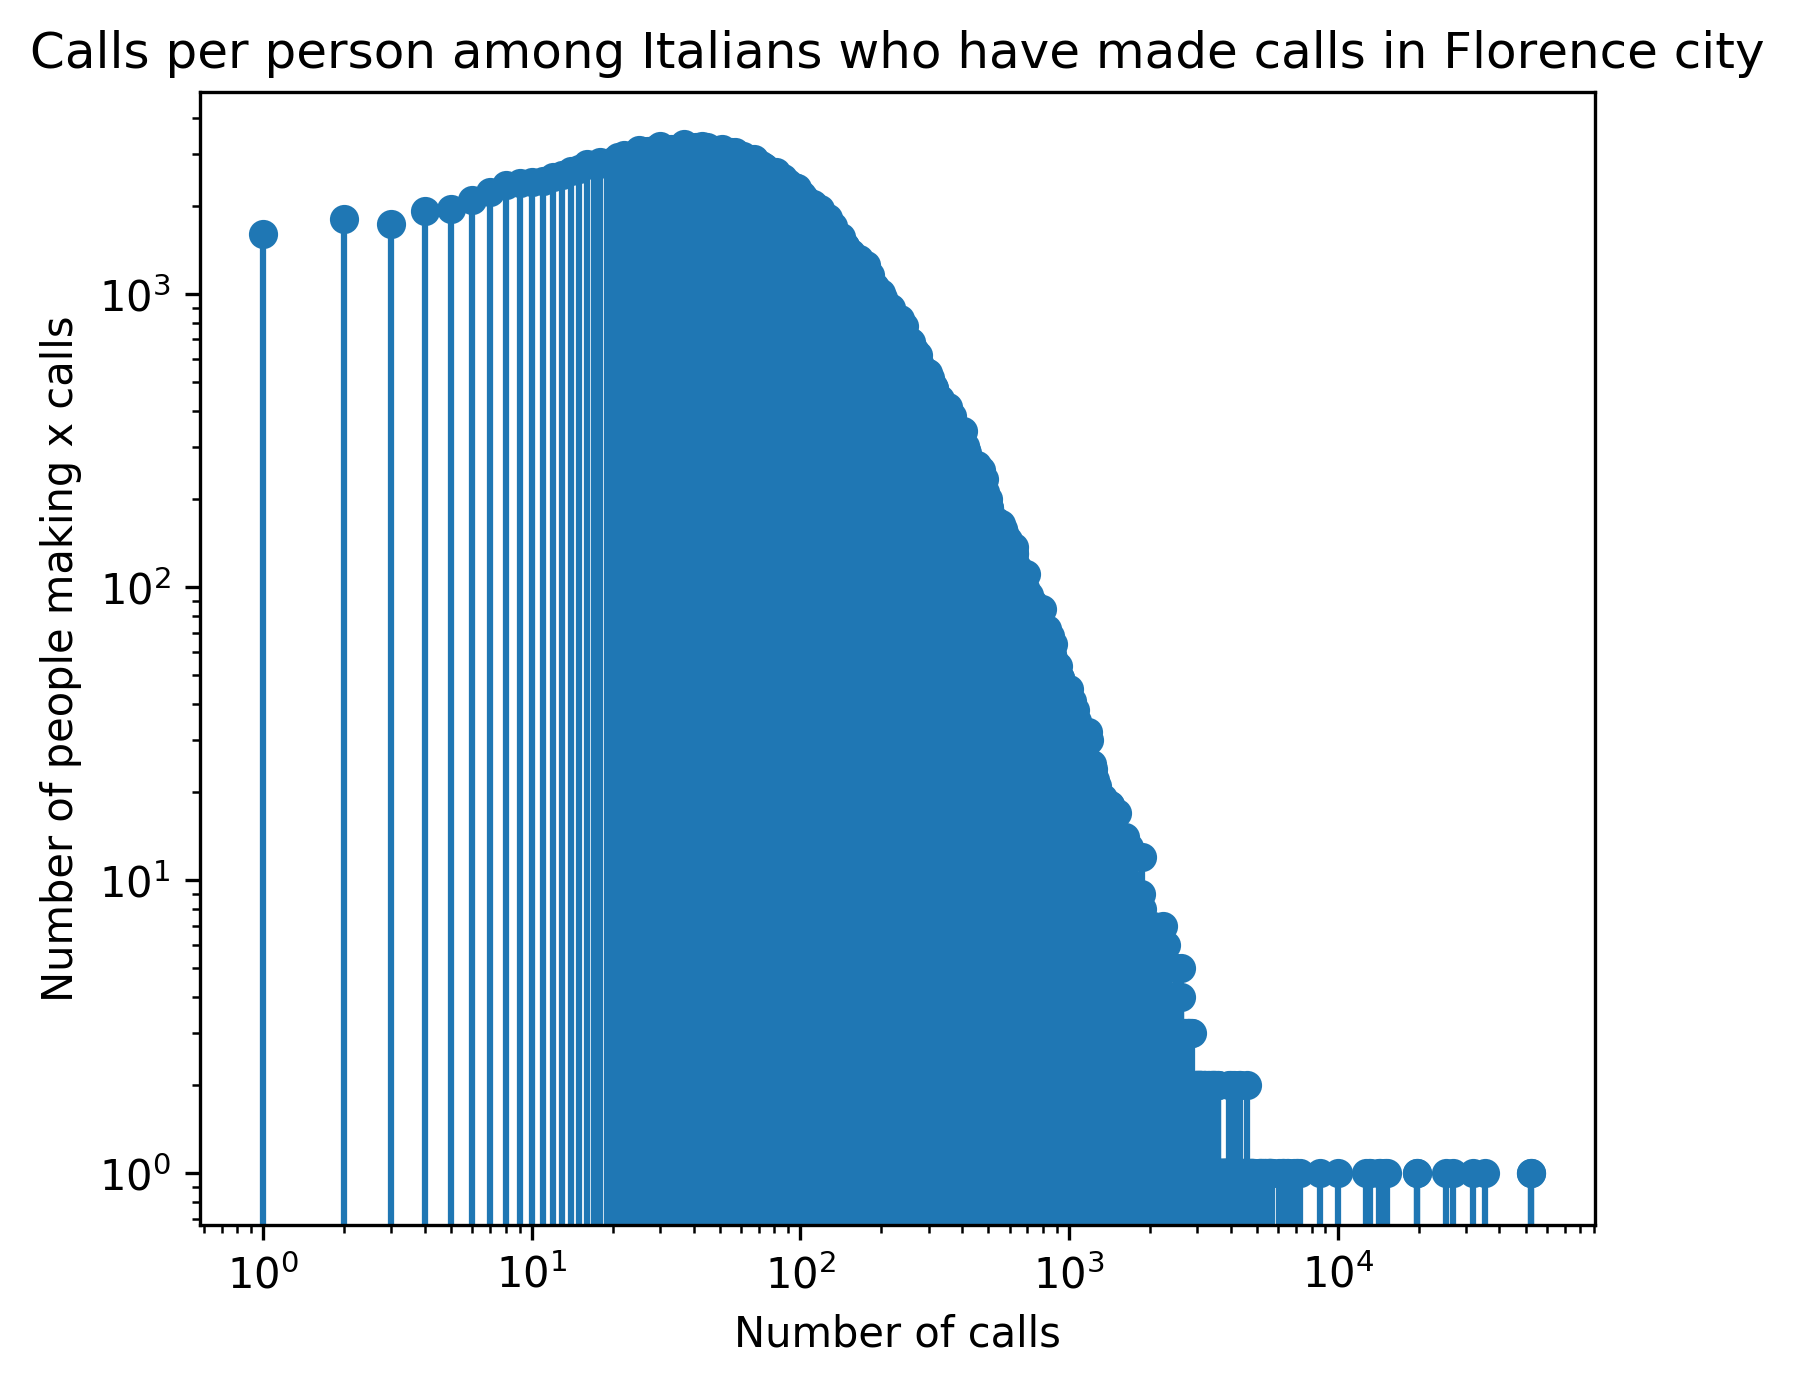

In [16]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc2['calls'],frc2['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Calls per person among Italians who have made calls in Florence city')
ax.set_ylabel('Number of people making x calls')
ax.set_xlabel('Number of calls')
plt.show()

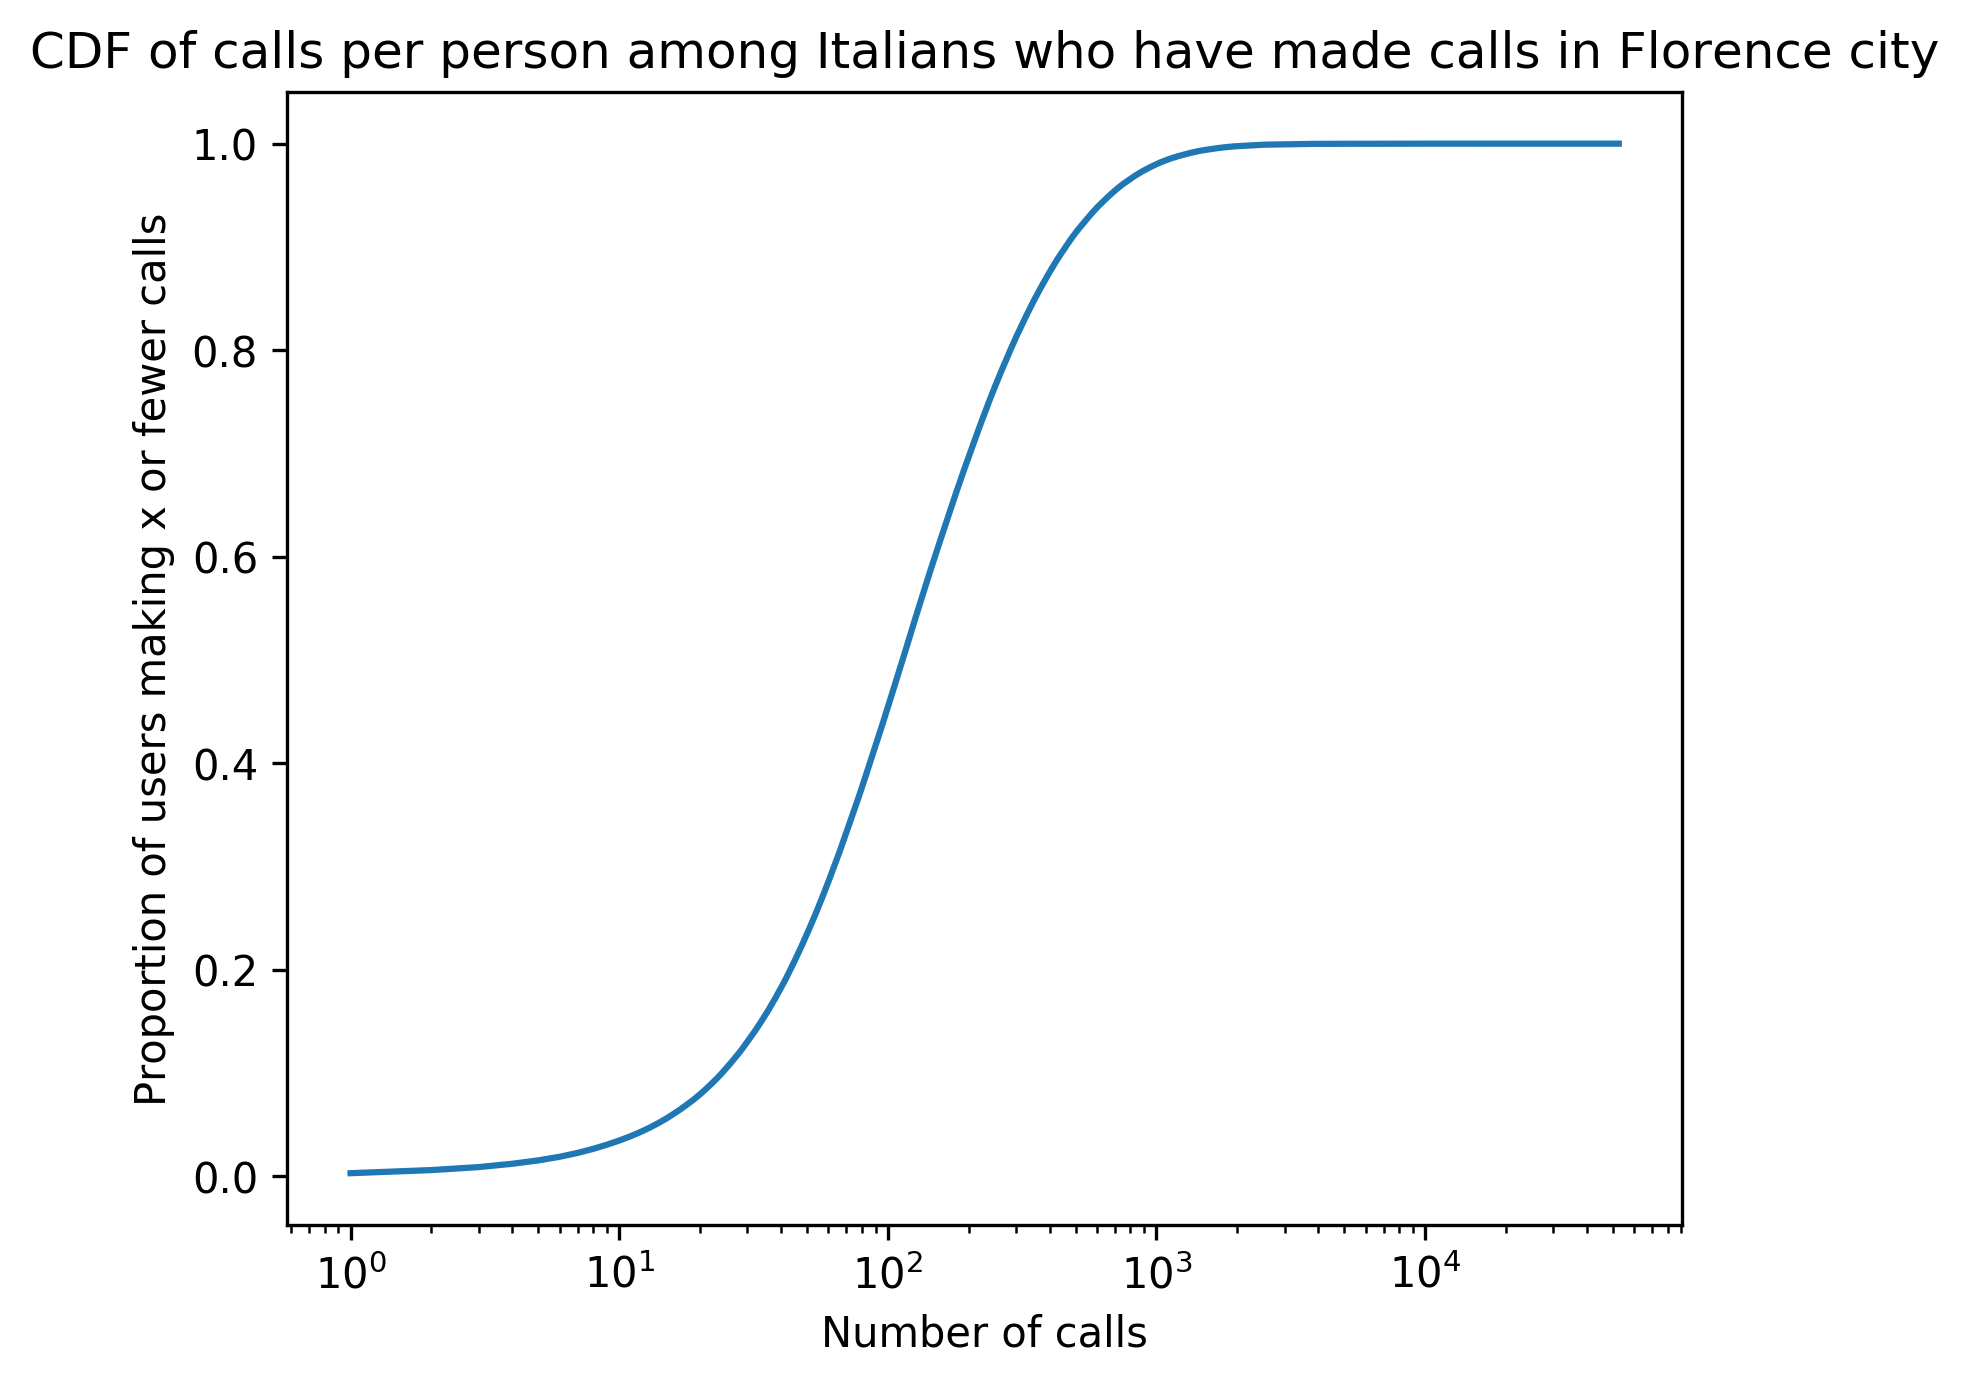

In [17]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc2['calls'],frc2['cumulative'])
# yscale('log')
xscale('log')
# ylim([.7,1.01])
ax.set_title('CDF of calls per person among Italians who have made calls in Florence city')
ax.set_ylabel('Proportion of users making x or fewer calls')
ax.set_xlabel('Number of calls')
# axvline(4.5) # Our cutoff
# axhline(.1)
plt.show()

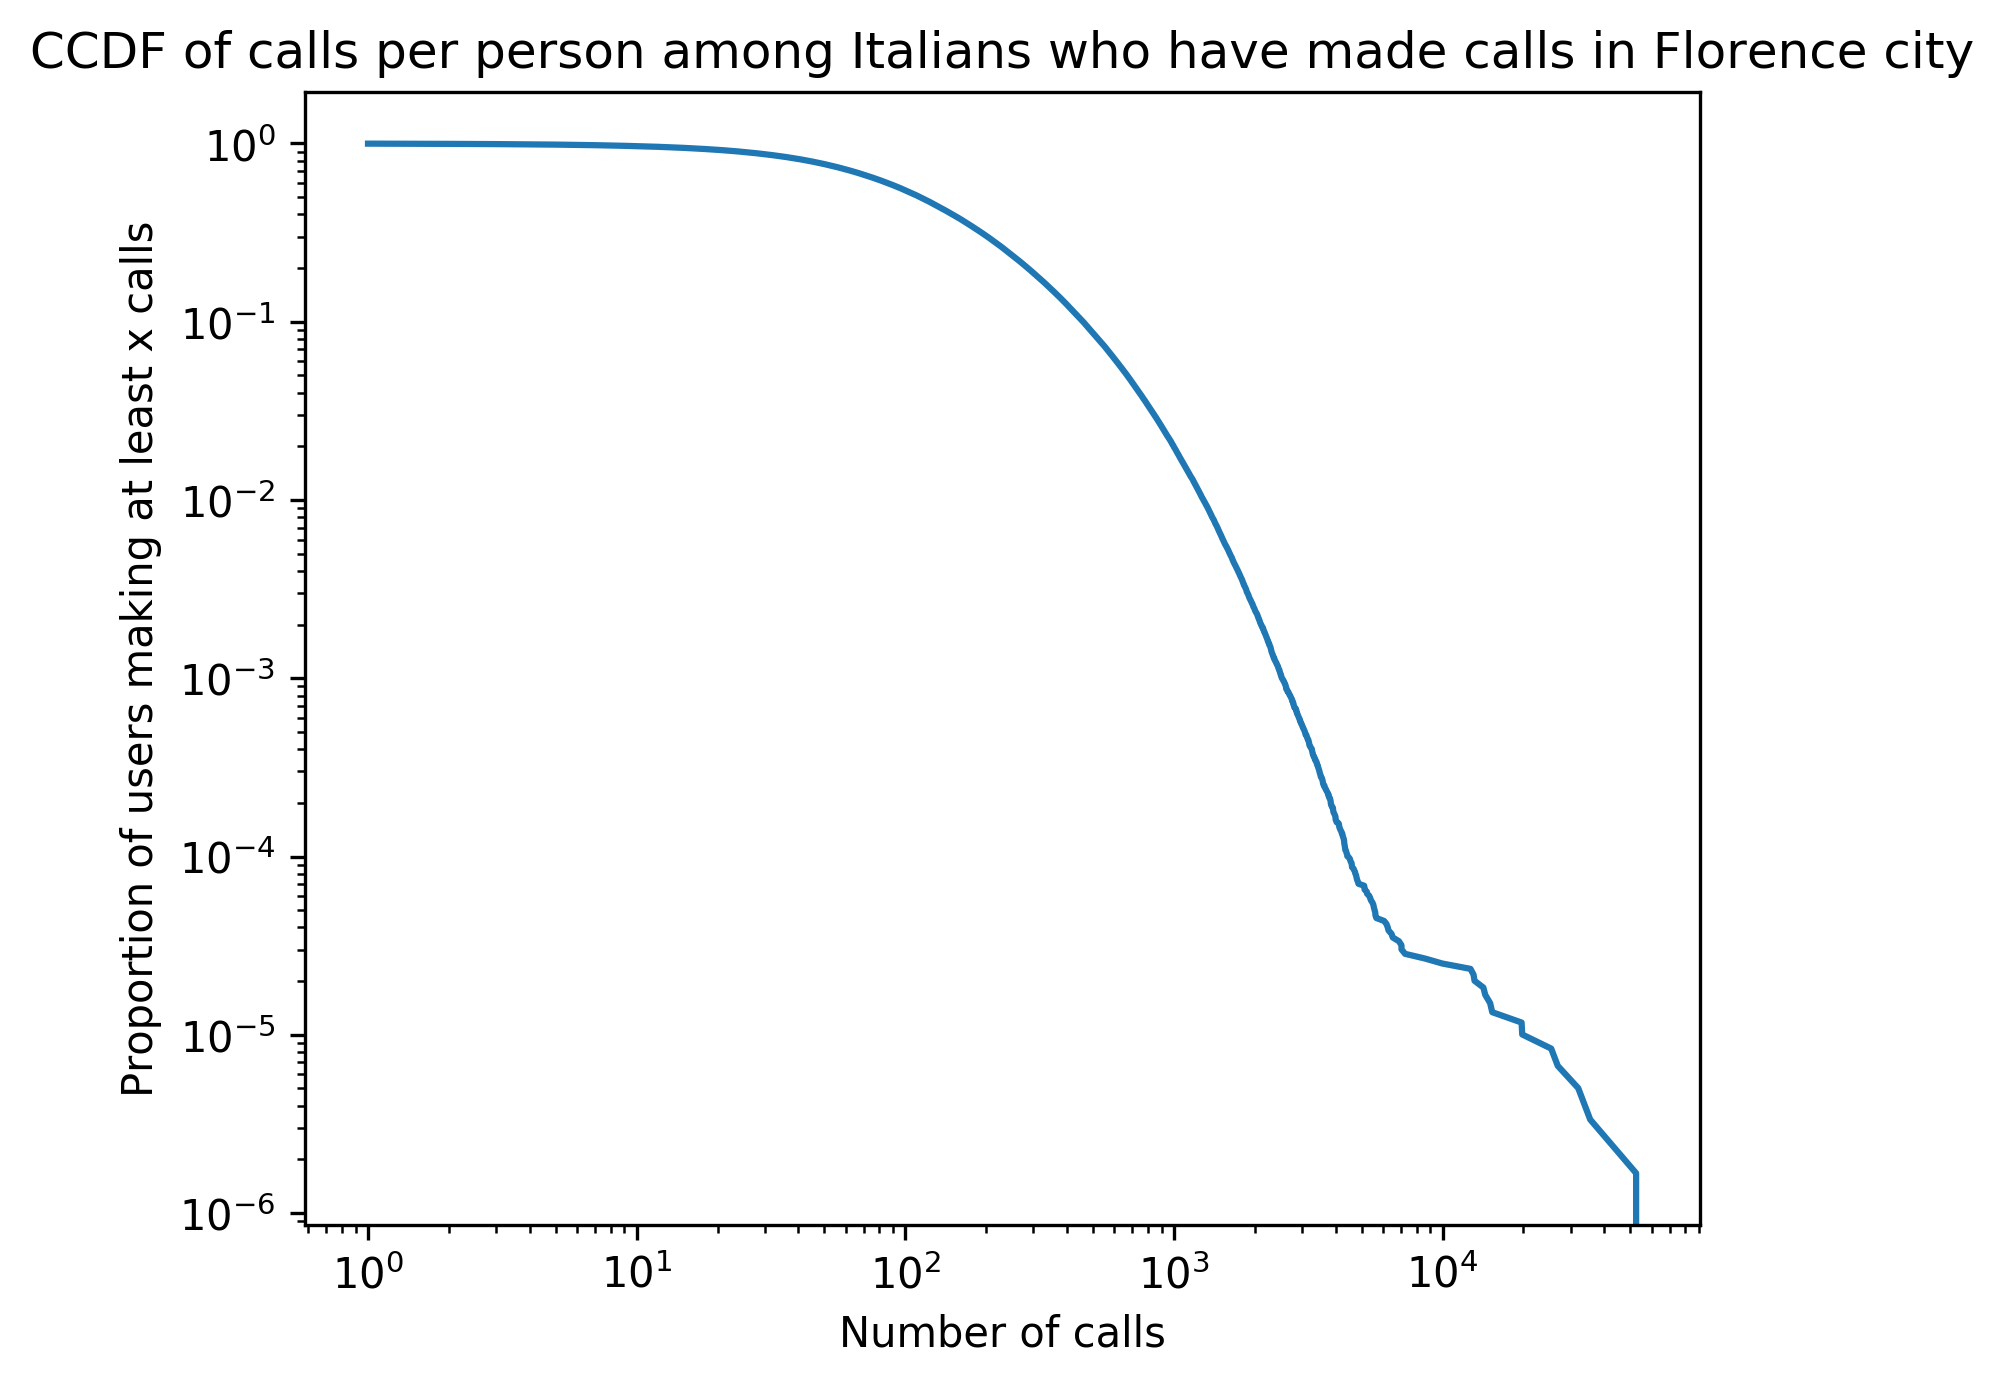

In [18]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc2['calls'],frc2['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of calls per person among Italians who have made calls in Florence city')
ax.set_ylabel('Proportion of users making at least x calls')
ax.set_xlabel('Number of calls')
plt.show()

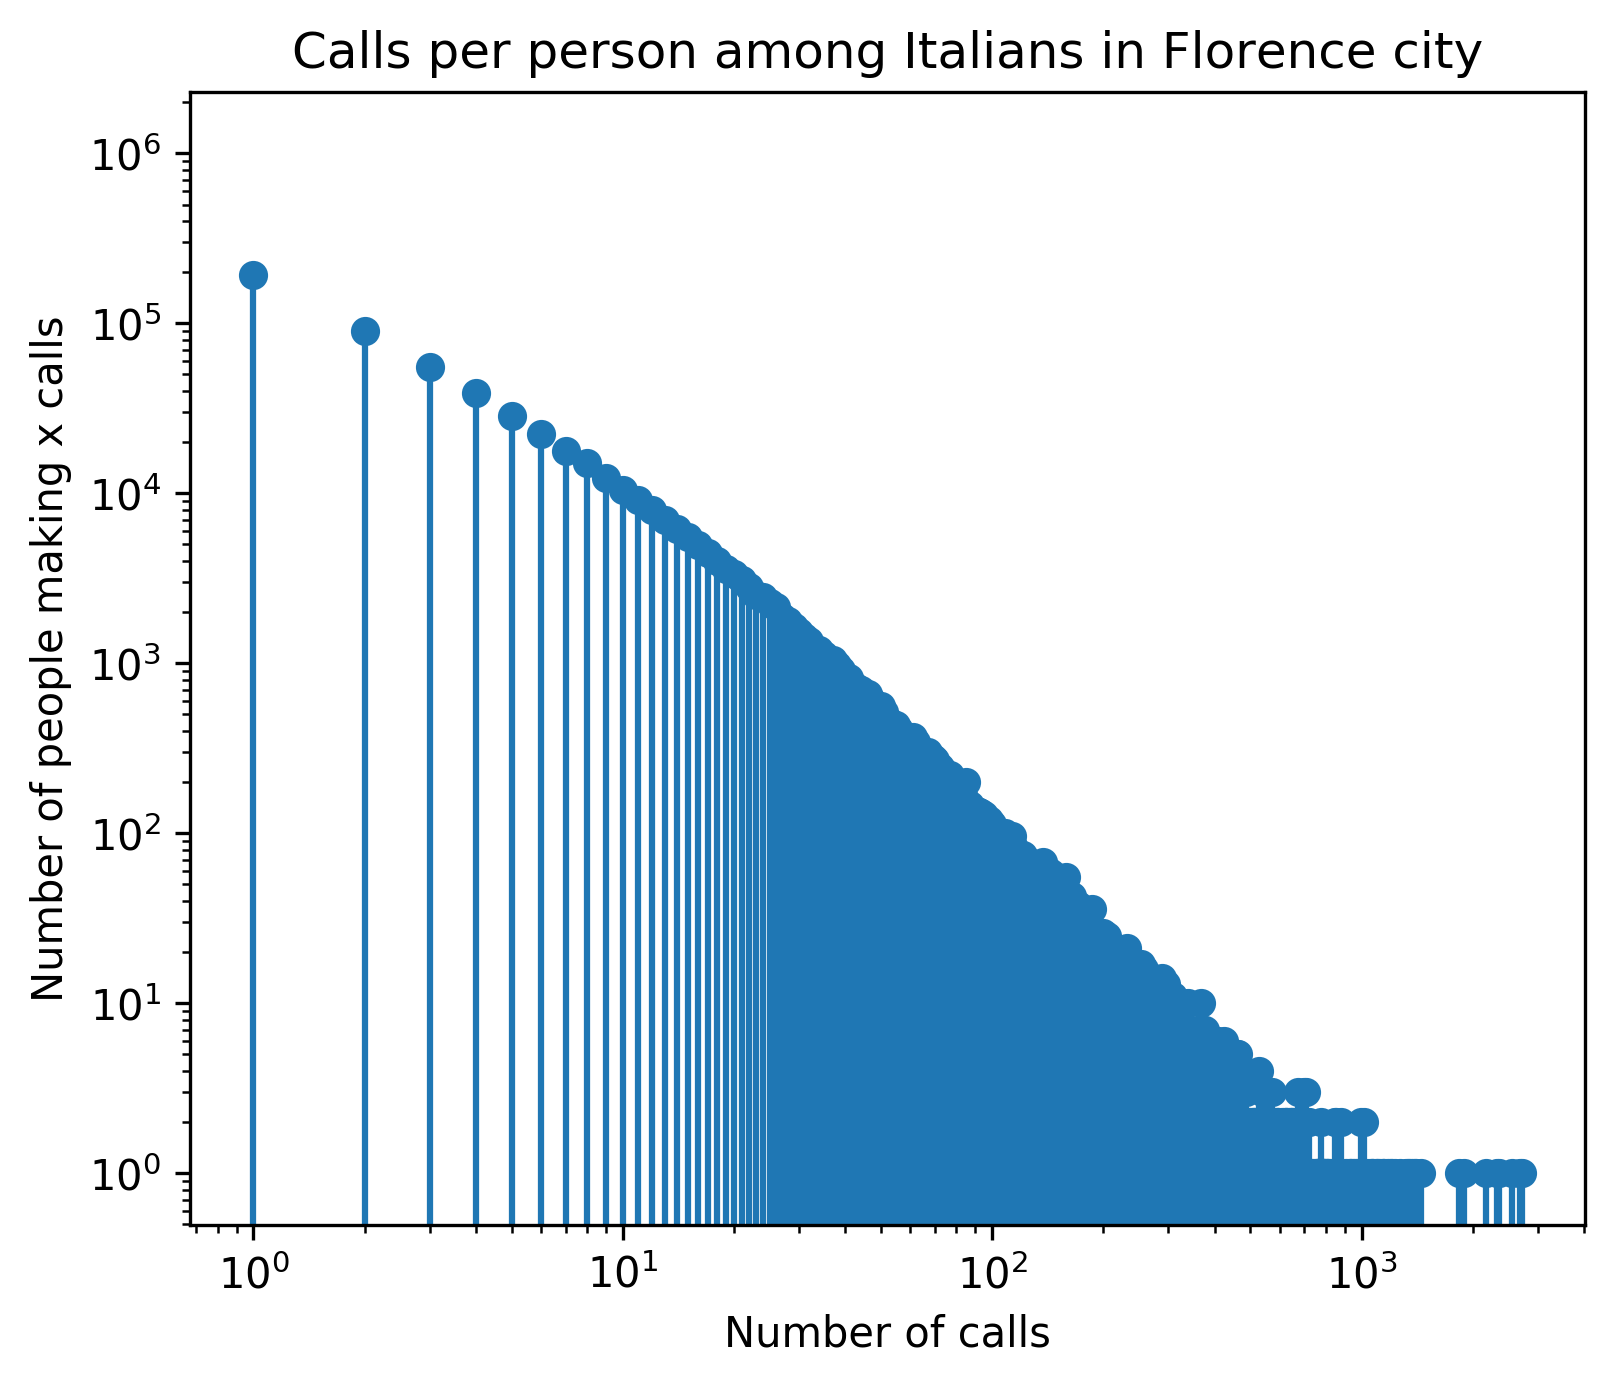

In [19]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc_uc['calls_in_florence_comune'],frc_uc['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Calls per person among Italians in Florence city')
ax.set_ylabel('Number of people making x calls')
ax.set_xlabel('Number of calls')
plt.show()

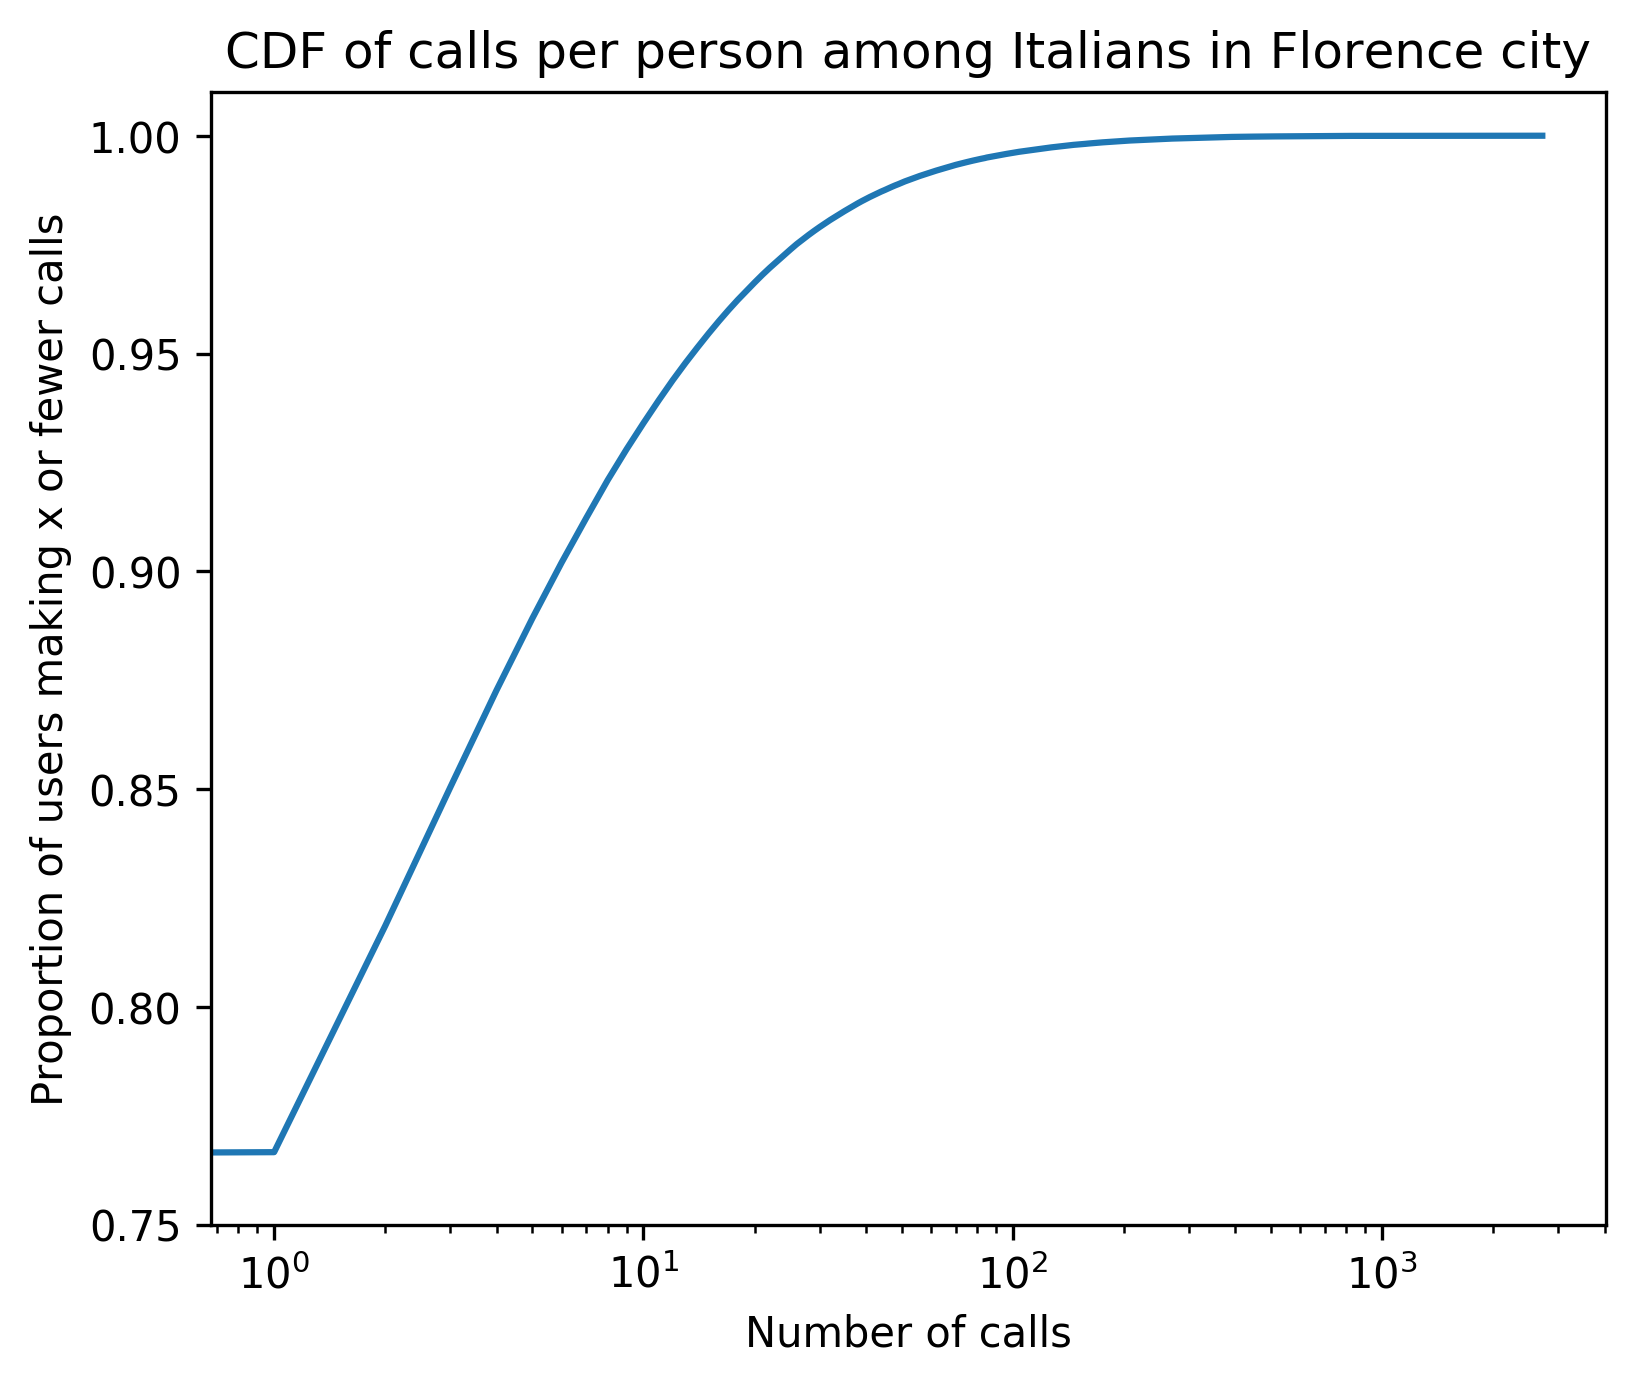

In [32]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_uc['calls_in_florence_comune'],frc_uc['cumulative'])
# yscale('log')
xscale('log')
ylim([.75,1.01])
ax.set_title('CDF of calls per person among Italians in Florence city')
ax.set_ylabel('Proportion of users making x or fewer calls')
ax.set_xlabel('Number of calls')
plt.show()

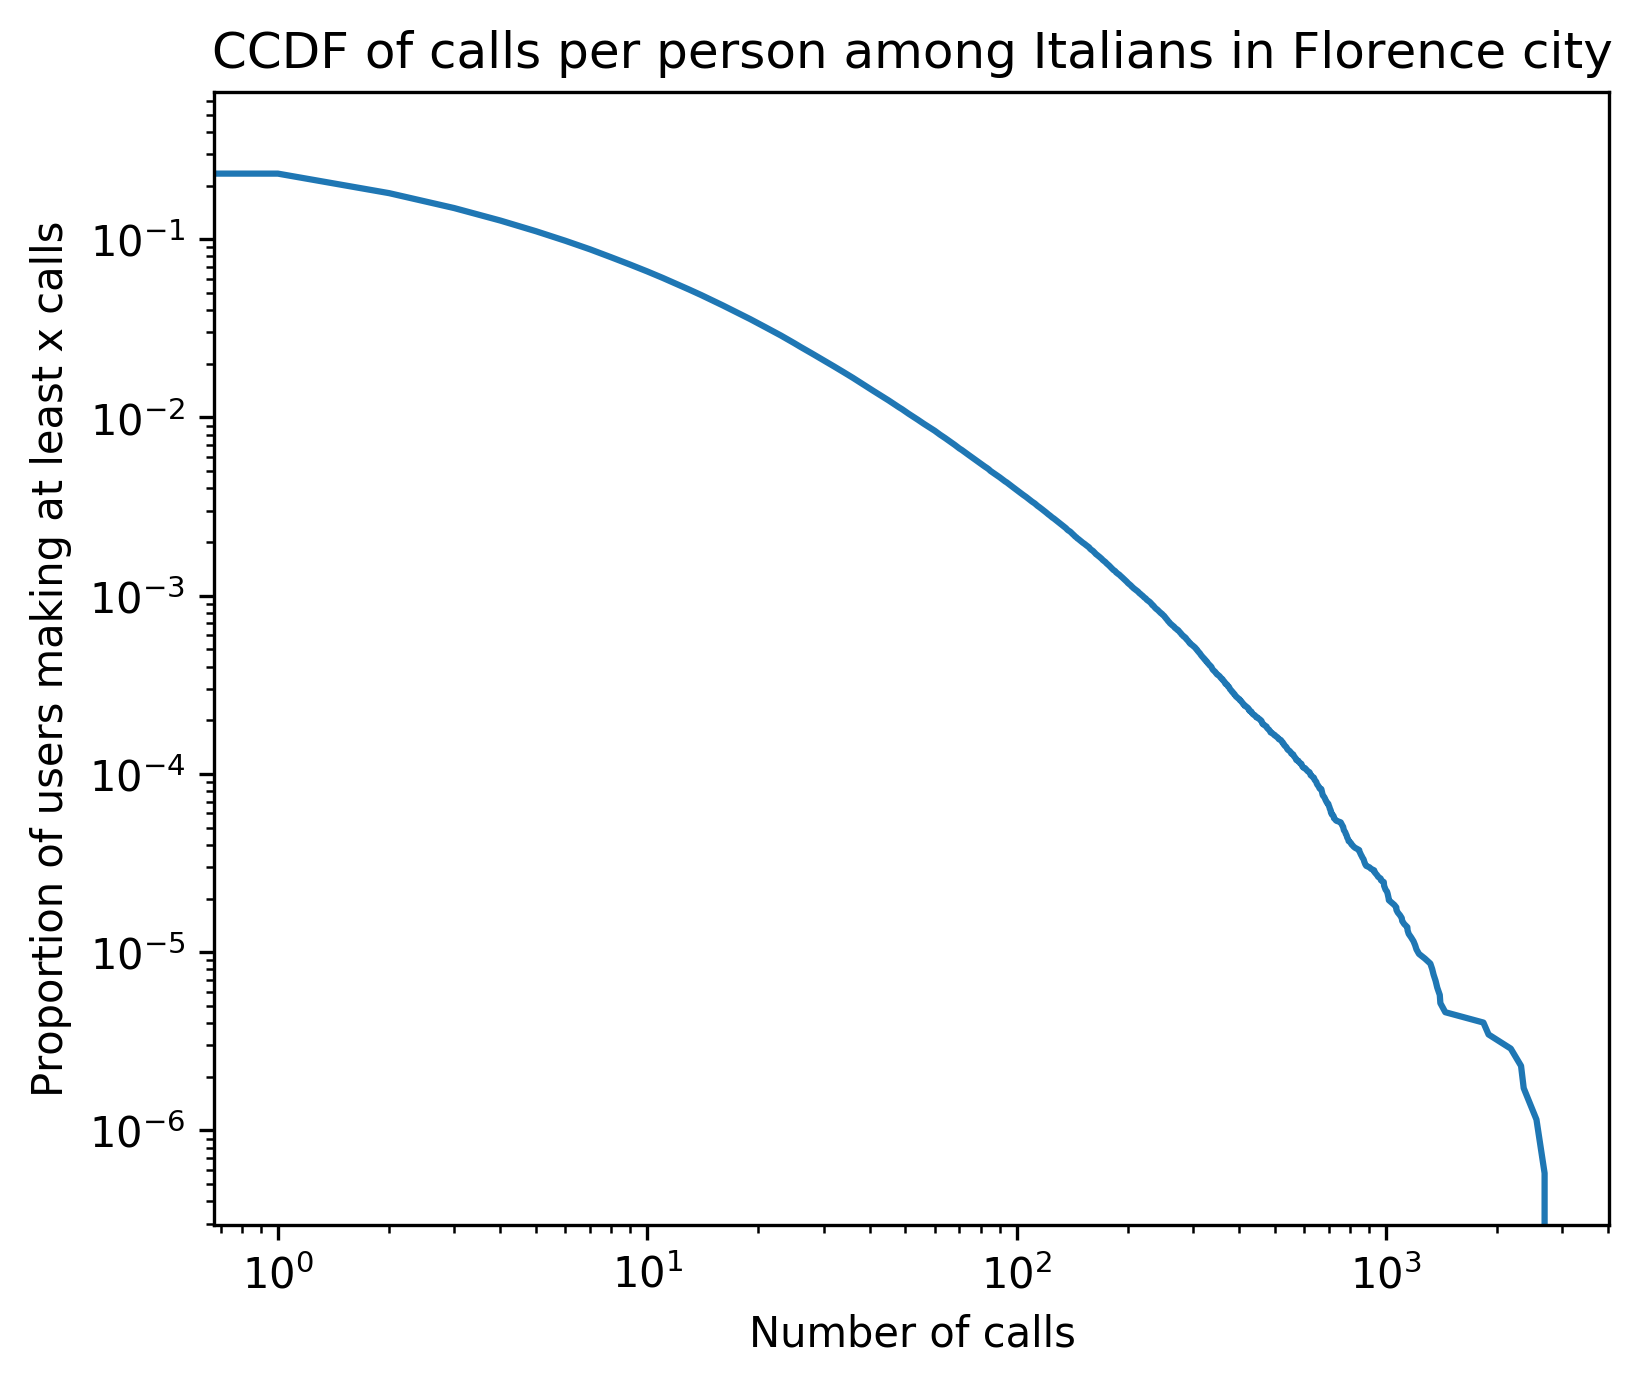

In [21]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_uc['calls_in_florence_comune'],frc_uc['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of calls per person among Italians in Florence city')
ax.set_ylabel('Proportion of users making at least x calls')
ax.set_xlabel('Number of calls')
plt.show()

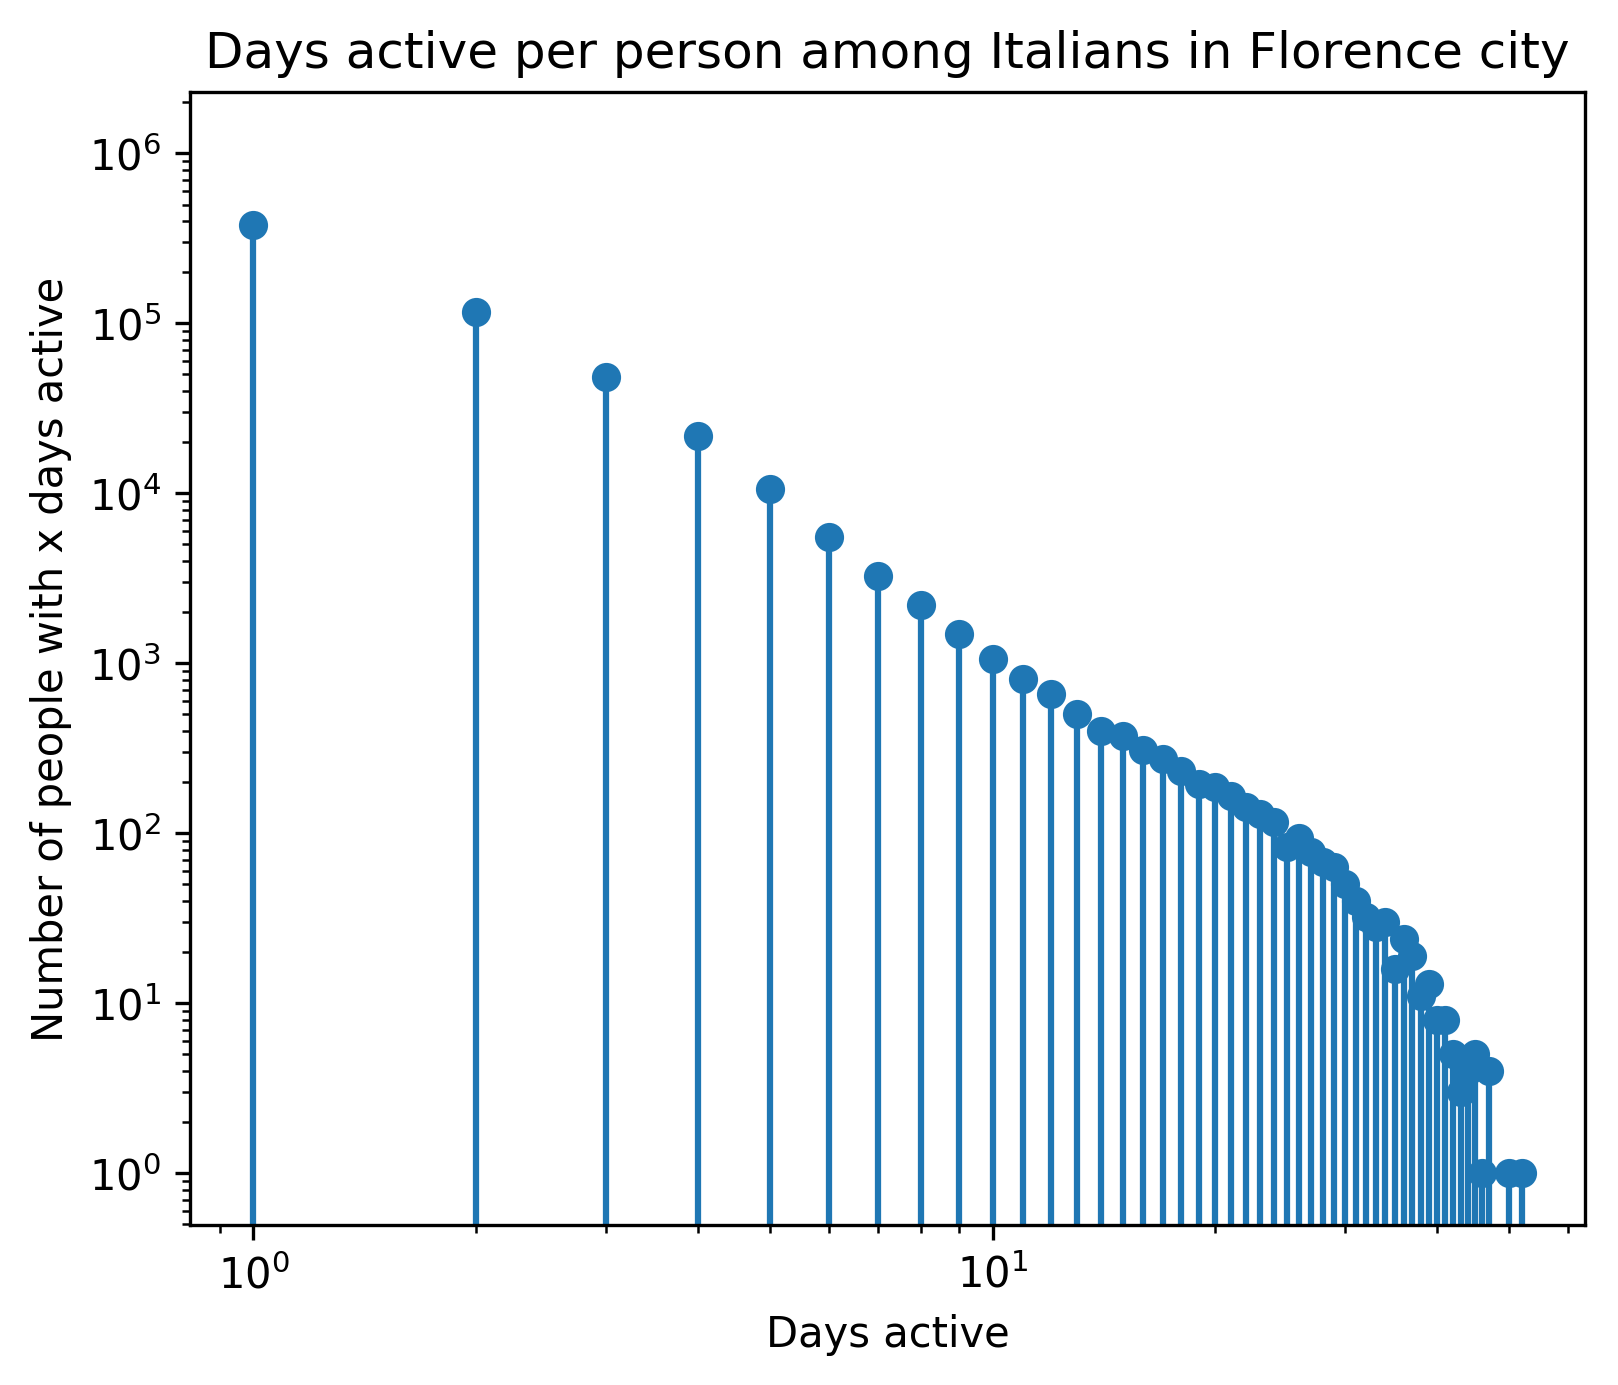

In [22]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc_dc['days_active_in_florence_comune'],frc_dc['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Days active per person among Italians in Florence city')
ax.set_ylabel('Number of people with x days active')
ax.set_xlabel('Days active')
plt.show()

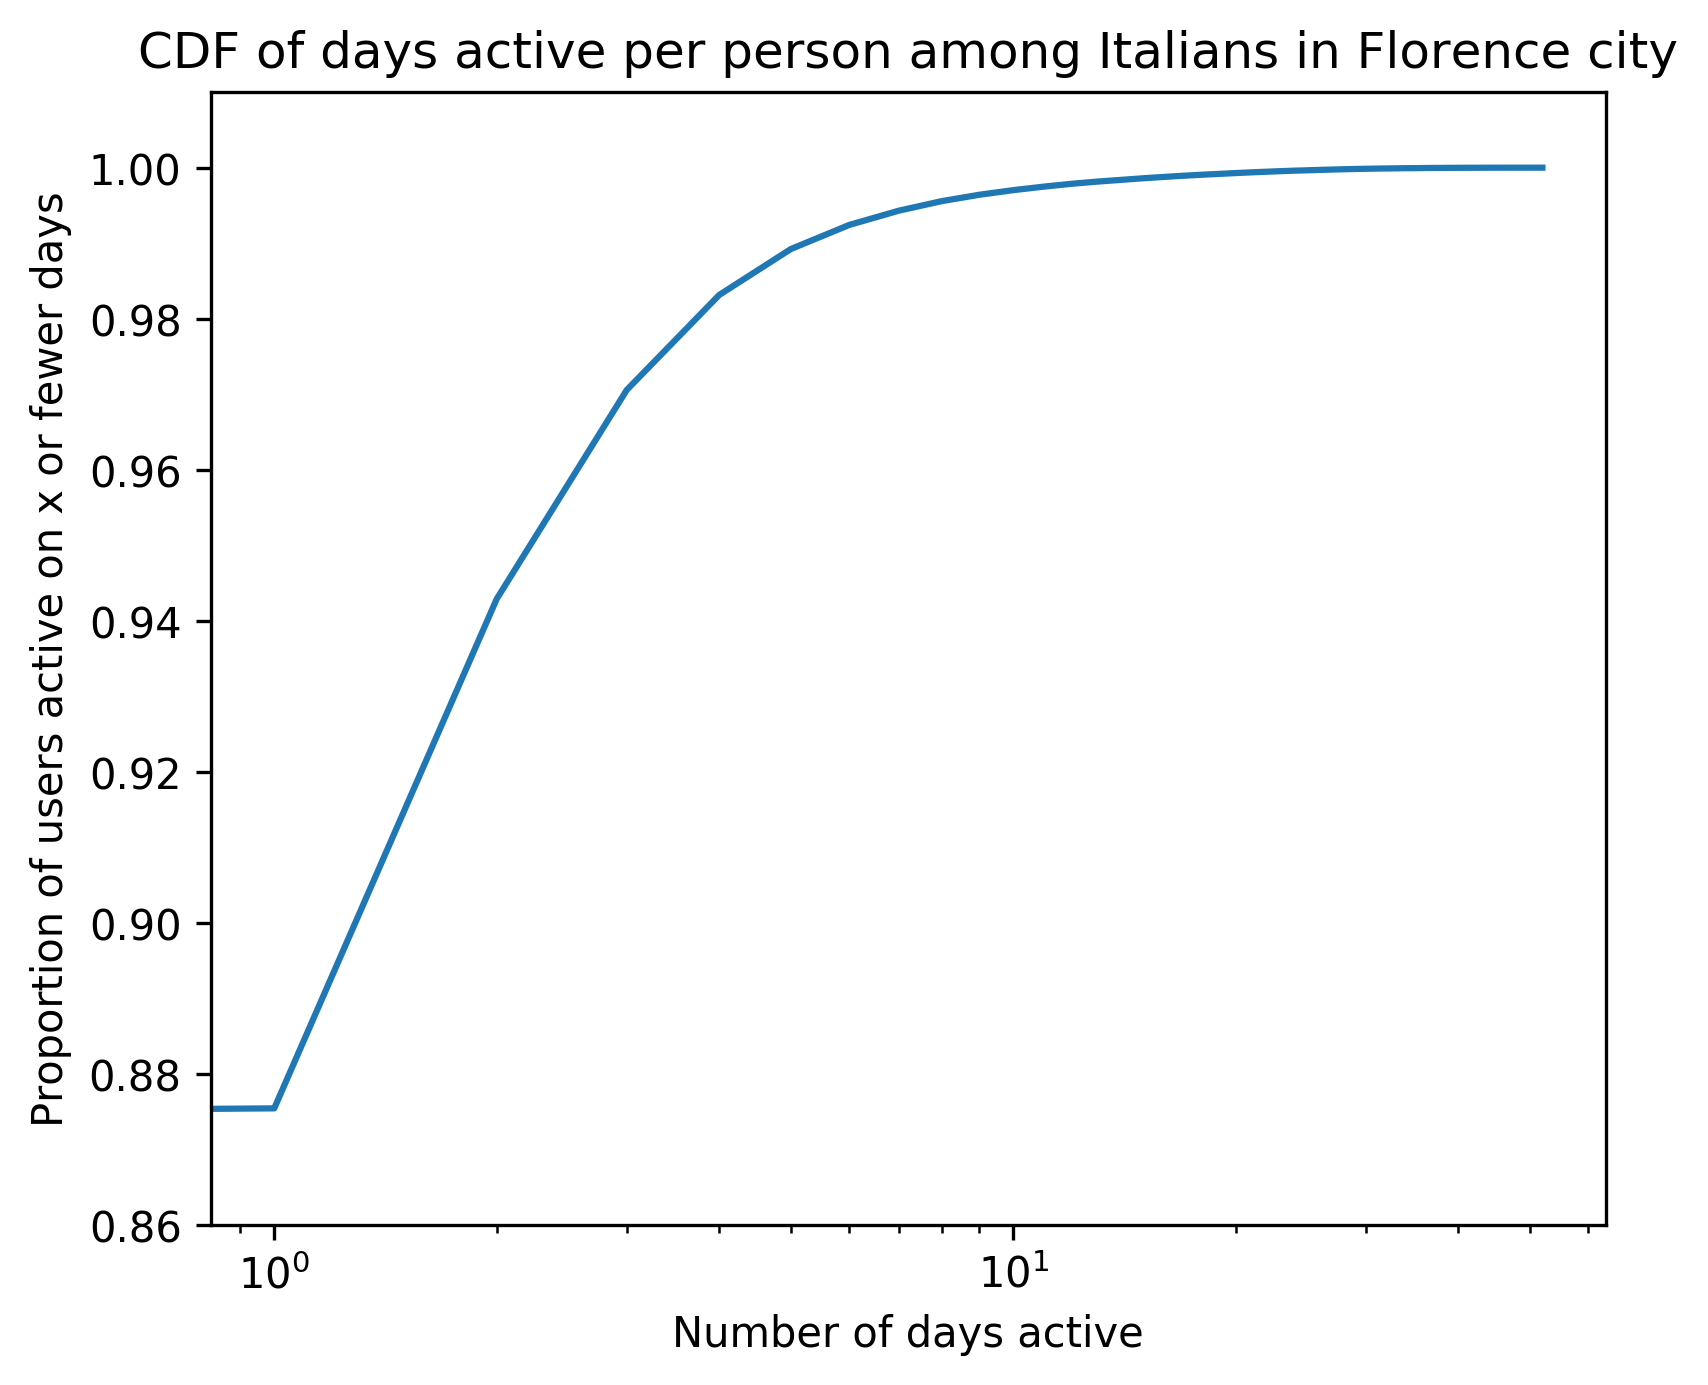

In [33]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_dc['days_active_in_florence_comune'],frc_dc['cumulative'])
# yscale('log')
xscale('log')
ylim([.86,1.01])
ax.set_title('CDF of days active per person among Italians in Florence city')
ax.set_ylabel('Proportion of users active on x or fewer days')
ax.set_xlabel('Number of days active')
plt.show()

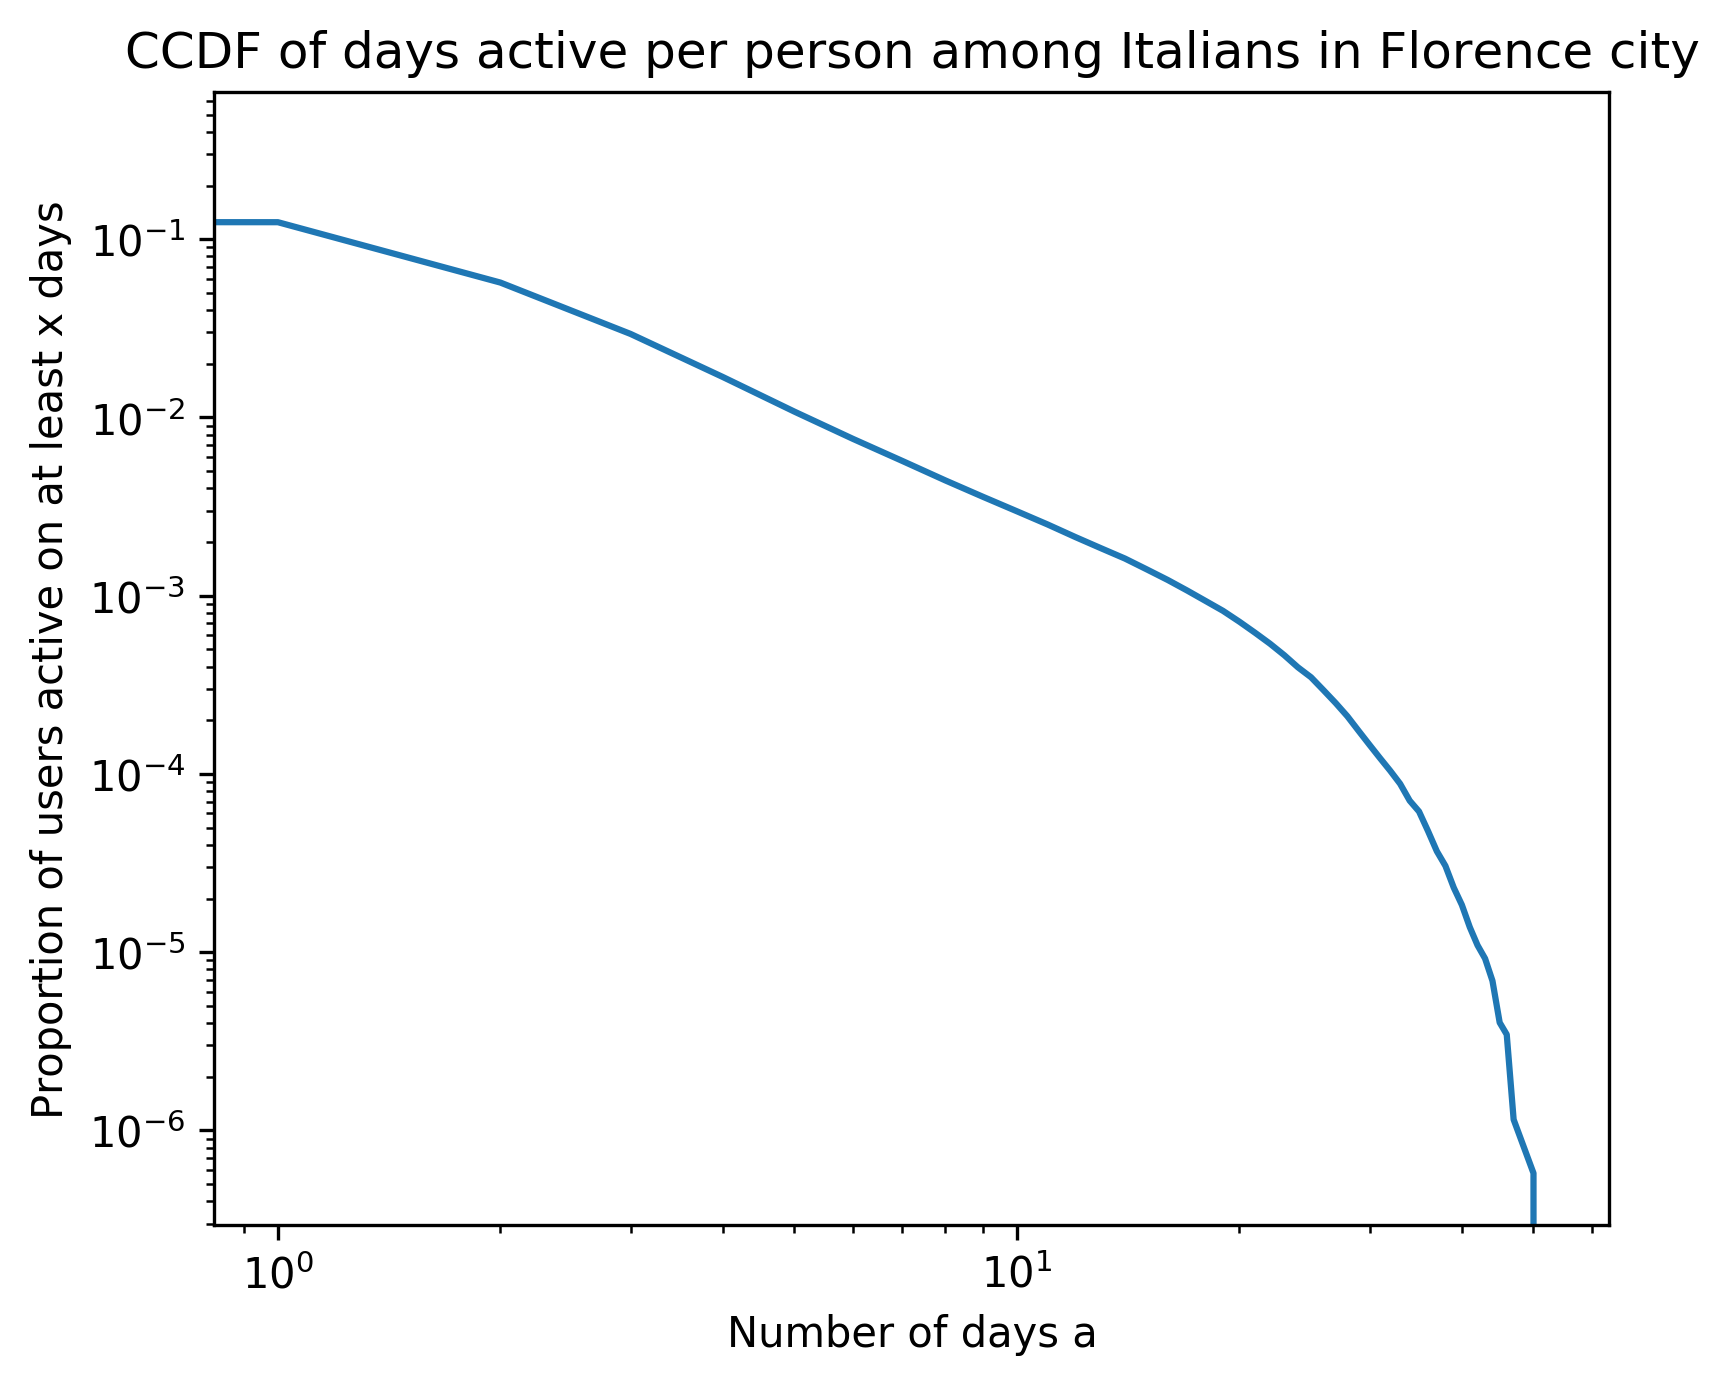

In [24]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_dc['days_active_in_florence_comune'],frc_dc['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of days active per person among Italians in Florence city')
ax.set_ylabel('Proportion of users active on at least x days')
ax.set_xlabel('Number of days a')
plt.show()

In [25]:
dfc['mean_calls_per_day'] = dfc['calls']/dfc['days_active']
dfc[dfc['calls_in_florence_comune']>0].head()

,cust_id,home_region,calls,days_active,days_active_in_florence_comune,calls_in_florence_comune,mean_calls_per_day
1,25440450,Campania,52588,48,20,120,1095.583333
2,29613826,Lazio,52546,46,26,320,1142.304348
6,2267462,Sicilia,35447,29,9,46,1222.310345
8,28437176,Puglia,31993,22,3,185,1454.227273
12,12558421,Toscana,26848,49,11,169,547.918367


In [26]:
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].max()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].min()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].median()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()*2+dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()*3+dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()

1461.88888889
1.0
16.2813373574
12.0
16.6621865933
49.6057105439
66.2678971372


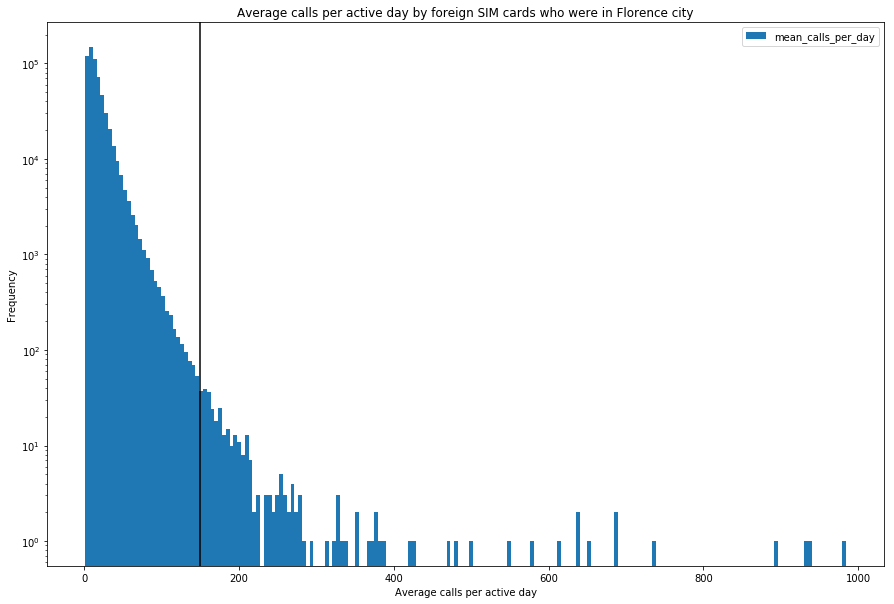

In [27]:
dfc[(dfc['calls_in_florence_comune']>0)&(dfc['mean_calls_per_day']<1000)].plot.hist(y='mean_calls_per_day', logy=True, figsize=(15,10), bins=200)
plt.ylabel('Frequency')
plt.xlabel('Average calls per active day')
plt.axvline(150,color="black")
# plt.xlim([0,1000])
plt.title('Average calls per active day by foreign SIM cards who were in Florence city')

In [28]:
# dfc.plot.scatter(x='calls',y='days_active',figsize=(15,10),logy=True,logx=True)

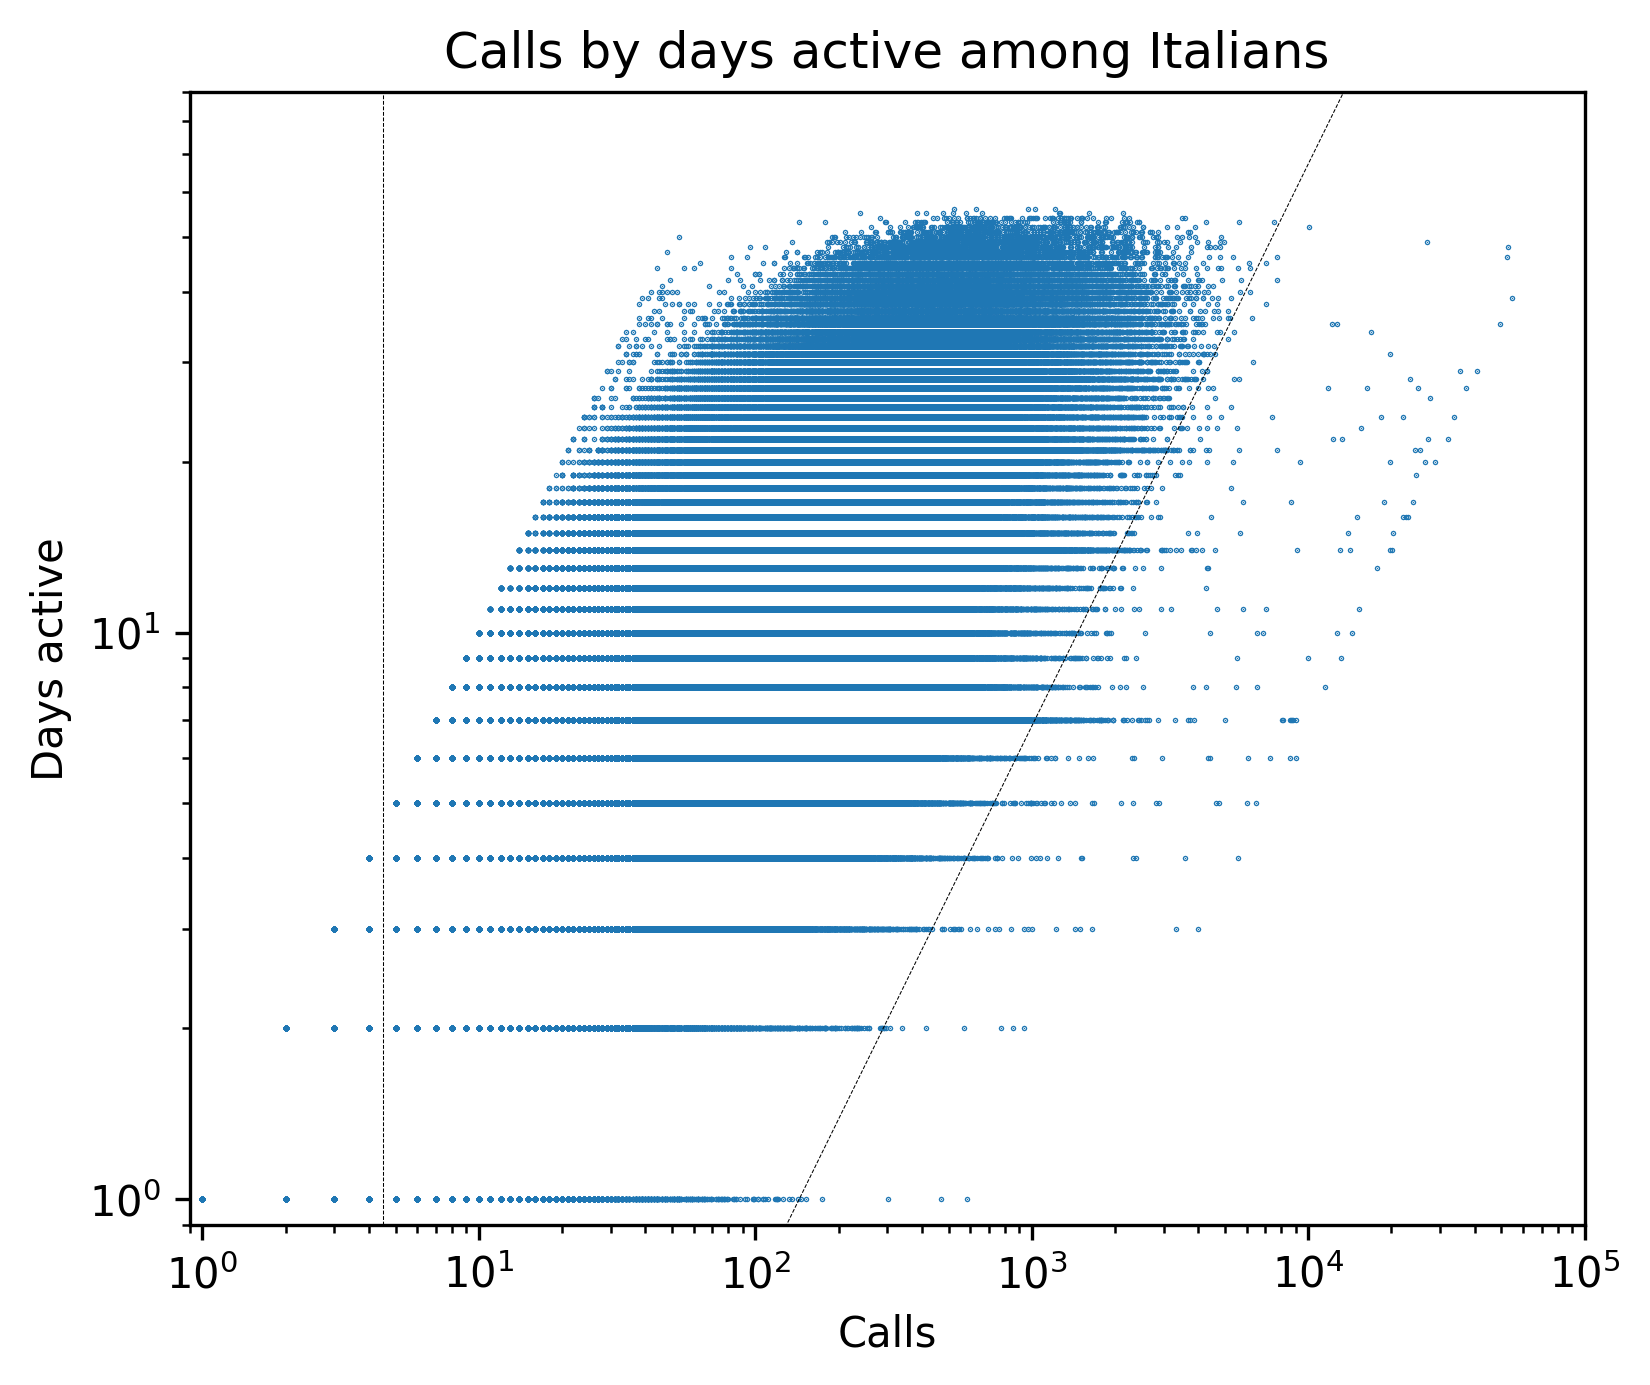

In [41]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['calls'],y=dfc['days_active'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Calls by days active among Italians')
ax.set_xlabel('Calls')
ax.set_ylabel('Days active')
y=[1/10000, 1*200]
x2=[150/10000, 150*200]
plt.plot(x2,y,color='black',linewidth=.25,ls='dashed')
ax.axvline(4.5,color='black',linewidth=.25,ls='dashed')
ylim([.9,90])
xlim([.9,10*10000])
plt.show()

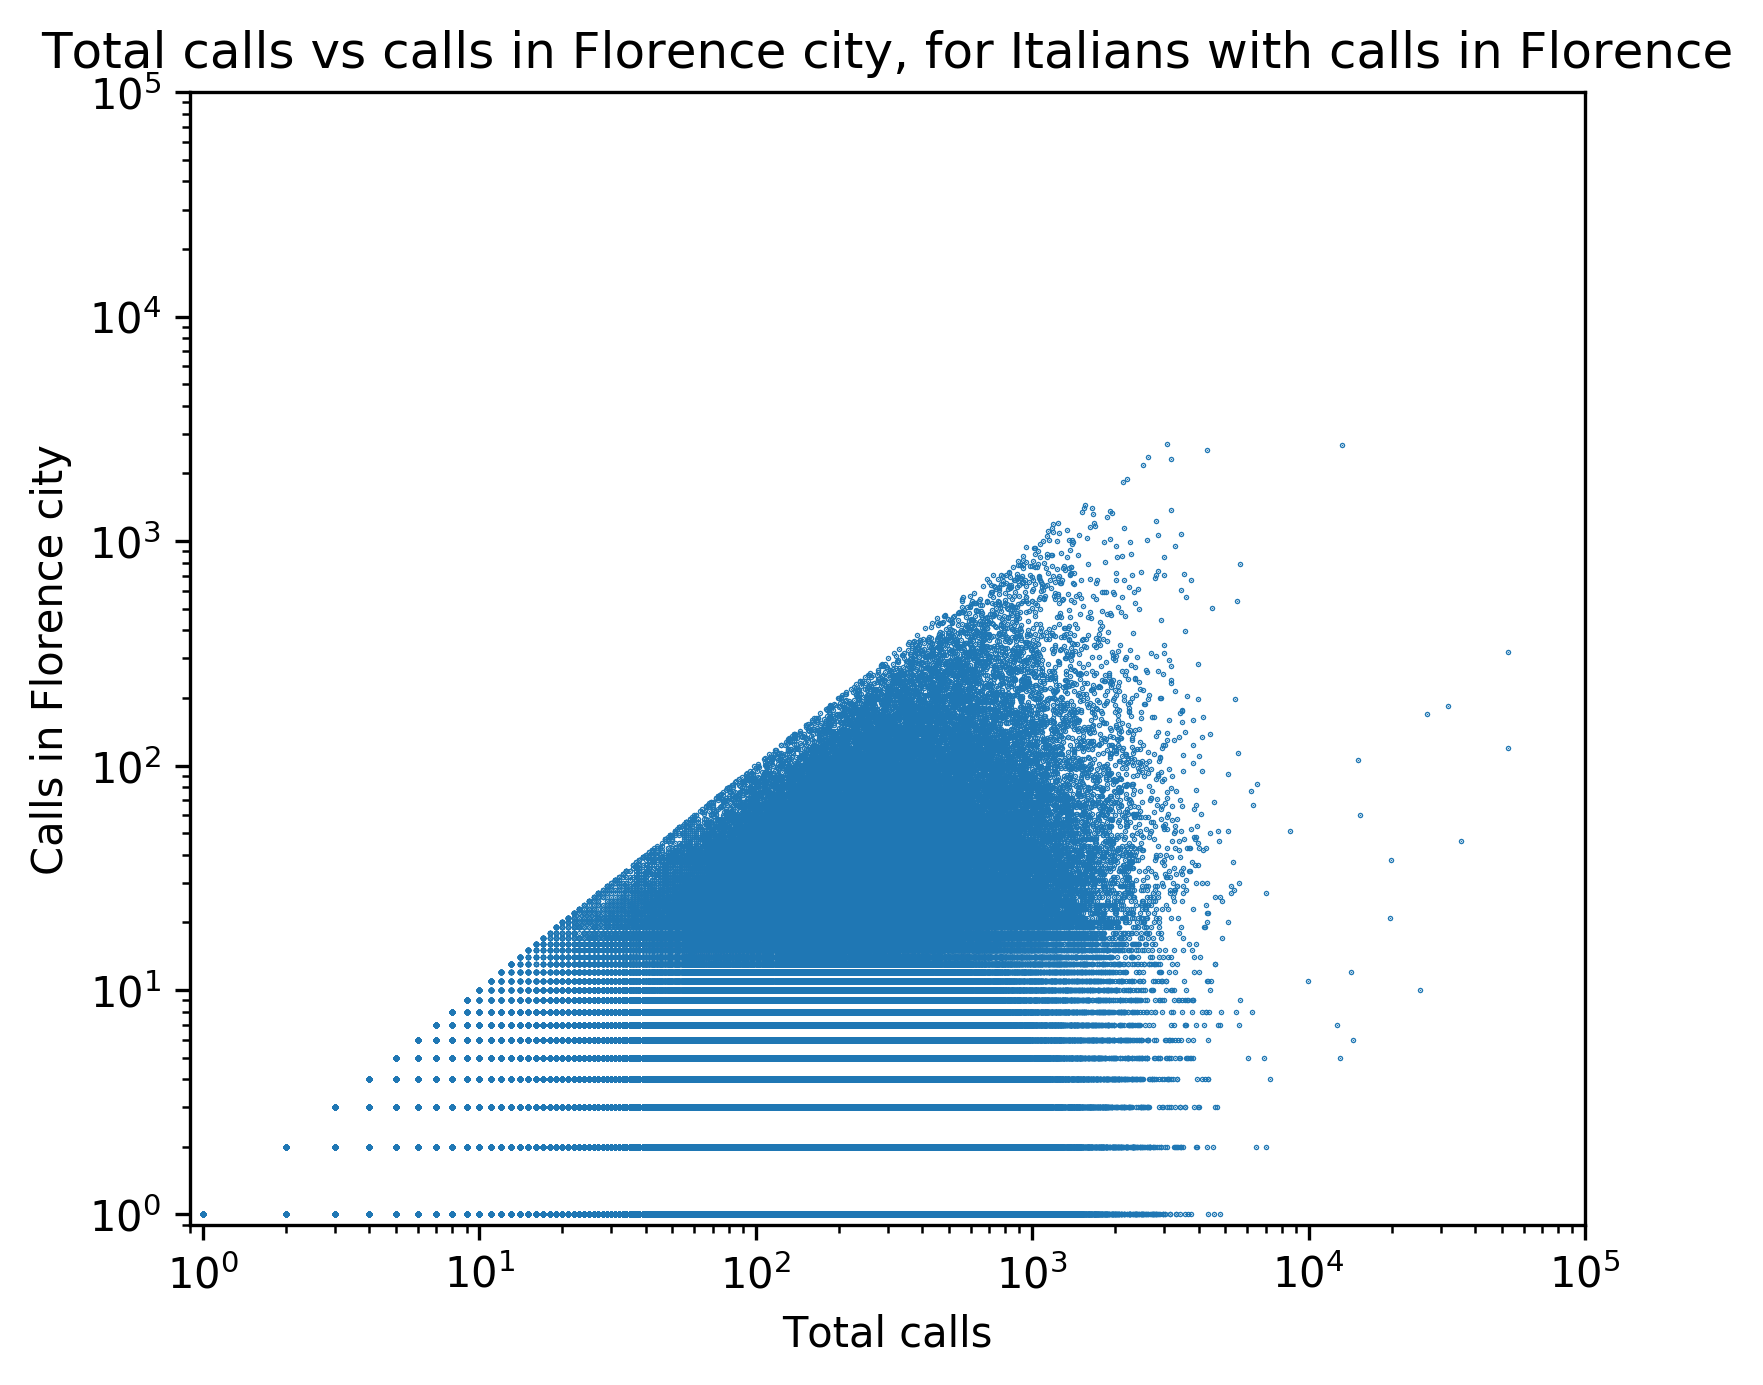

In [30]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['calls'],y=dfc['calls_in_florence_comune'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Total calls vs calls in Florence city, for Italians with calls in Florence')
ax.set_xlabel('Total calls')
ax.set_ylabel('Calls in Florence city')
xlim([.9,10*10000])
ylim([.9,10*10000])
plt.show()

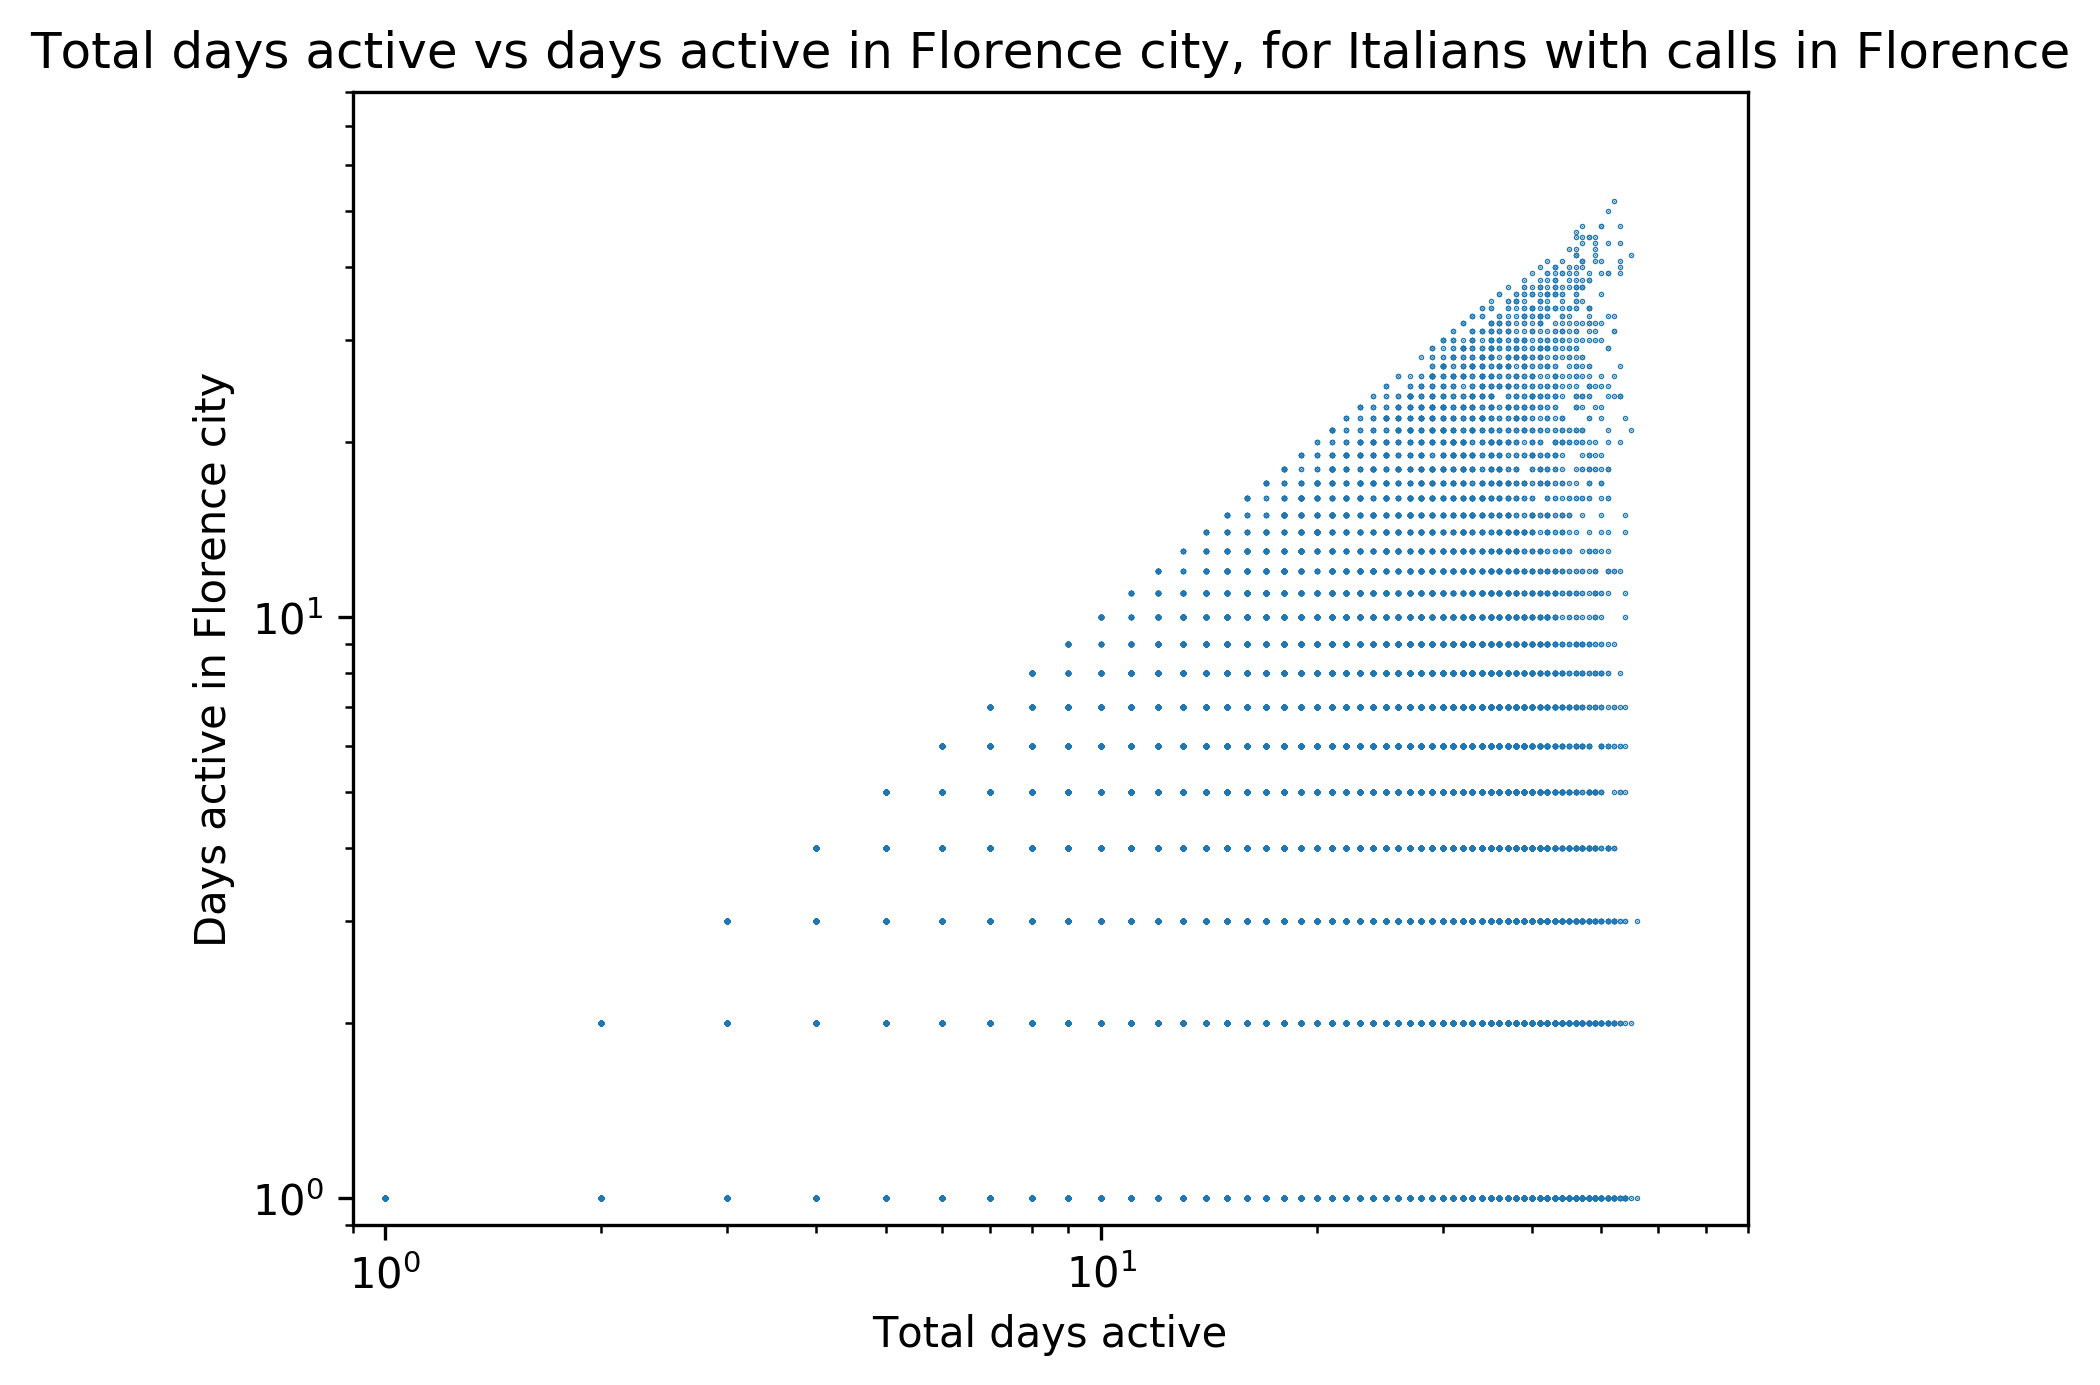

In [44]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['days_active'],y=dfc['days_active_in_florence_comune'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Total days active vs days active in Florence city, for Italians with calls in Florence')
ax.set_xlabel('Total days active')
ax.set_ylabel('Days active in Florence city')
ylim([.9,80])
xlim([.9,80])
plt.show()